# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

responses = []
query_url = f"{base_url}appid={weather_api_key}&q="

# Get weather data
print("Beginning Data Retrieval")
print("---------------------------------")

city_counter = 1
set_counter = 1

for i, city in enumerate(cities):
    if (i%50 == 0 and i>= 50):
        set_counter += 1
        city_counter = 0
         
    print("Processing Record %s of Set %s | %s" % (city_counter, set_counter, city)) 
    city_counter += 1
       
    try:
        response = requests.get(query_url + city + "&units=imperial").json()
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        dates = response["dt"]
        country = response["sys"]["country"]
        
        responses.append({"City": city, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity":humidity,
                          "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Date":dates, "Country":country})
               
        
    except:
        print(f"City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | caravelas
Processing Record 3 of Set 1 | lakhimpur
Processing Record 4 of Set 1 | saeby
Processing Record 5 of Set 1 | katangli
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | sonegaon
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | coquimbo
Processing Record 10 of Set 1 | saint-joseph
Processing Record 11 of Set 1 | binzhou
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | nenjiang
Processing Record 14 of Set 1 | udala
Processing Record 15 of Set 1 | belaya gora
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | wakkanai
Processing Record 22 of Set 1 | mar del plata
Processing Record

Processing Record 37 of Set 4 | chalons-en-champagne
Processing Record 38 of Set 4 | waddan
Processing Record 39 of Set 4 | roquetas de mar
Processing Record 40 of Set 4 | tiksi
Processing Record 41 of Set 4 | escarcega
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | herat
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | nome
Processing Record 46 of Set 4 | ribeira grande
Processing Record 47 of Set 4 | kruisfontein
Processing Record 48 of Set 4 | umm kaddadah
Processing Record 49 of Set 4 | totness
Processing Record 0 of Set 5 | lawton
Processing Record 1 of Set 5 | zdvinsk
Processing Record 2 of Set 5 | vrani
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | pokhara
Processing Record 5 of Set 5 | olinda
Processing Record 6 of Set 5 | ambilobe
Processing Record 7 of Set 5 | cidreira
Processing Record 8 of Set 5 | bonthe
Processing Record 9 of Set 5 | yala
Processing Record 10 of Set 5 | bom jardim
Processing

Processing Record 31 of Set 8 | zolotkovo
Processing Record 32 of Set 8 | the pas
Processing Record 33 of Set 8 | pedasi
Processing Record 34 of Set 8 | rudnogorsk
Processing Record 35 of Set 8 | maceio
Processing Record 36 of Set 8 | camabatela
Processing Record 37 of Set 8 | tselinnoye
Processing Record 38 of Set 8 | salinopolis
Processing Record 39 of Set 8 | kadugannawa
Processing Record 40 of Set 8 | caririacu
Processing Record 41 of Set 8 | copiapo
Processing Record 42 of Set 8 | sembabule
Processing Record 43 of Set 8 | gladstone
Processing Record 44 of Set 8 | castlemaine
Processing Record 45 of Set 8 | vaitape
Processing Record 46 of Set 8 | oistins
Processing Record 47 of Set 8 | cheremukhovo
Processing Record 48 of Set 8 | nelson bay
Processing Record 49 of Set 8 | rungata
City not found. Skipping...
Processing Record 0 of Set 9 | grand-santi
Processing Record 1 of Set 9 | damghan
Processing Record 2 of Set 9 | sinnamary
Processing Record 3 of Set 9 | toyokawa
Processing Rec

Processing Record 23 of Set 12 | touros
Processing Record 24 of Set 12 | contamana
Processing Record 25 of Set 12 | grand gaube
Processing Record 26 of Set 12 | awjilah
Processing Record 27 of Set 12 | bonnyville
Processing Record 28 of Set 12 | robat karim
Processing Record 29 of Set 12 | cserszegtomaj
Processing Record 30 of Set 12 | tateyama
Processing Record 31 of Set 12 | vanderhoof
Processing Record 32 of Set 12 | rorvik
Processing Record 33 of Set 12 | vila
Processing Record 34 of Set 12 | berlevag
Processing Record 35 of Set 12 | riyadh
Processing Record 36 of Set 12 | jardim
Processing Record 37 of Set 12 | namibe
Processing Record 38 of Set 12 | mecca
Processing Record 39 of Set 12 | nantucket
Processing Record 40 of Set 12 | plattsburgh
Processing Record 41 of Set 12 | atbasar
Processing Record 42 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 43 of Set 12 | arandis
Processing Record 44 of Set 12 | ust-bolsheretsk
City not found. Skipping...
Processing R

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df = pd.DataFrame(responses, columns=["City","Lat","Lng","Max Temp","Humidity",
                                             "Cloudiness","Wind Speed","Date","Country"])
cities_df.to_csv('output.csv', index=True)


In [7]:
cities_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,caravelas,-17.7125,-39.2481,80.51,59,0,9.53,1627476317,BR
1,lakhimpur,27.9500,80.7667,86.20,74,100,6.26,1627476319,IN
2,saeby,57.3319,10.5225,69.96,79,72,9.42,1627476321,DK
3,katangli,51.7102,143.2326,62.01,90,95,4.00,1627476322,RU
4,mataura,-46.1927,168.8643,46.47,98,40,3.56,1627476322,NZ


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [120]:
cities_df['Humidity'].describe()

count    535.000000
mean      70.844860
std       20.121174
min        8.000000
25%       61.000000
50%       76.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

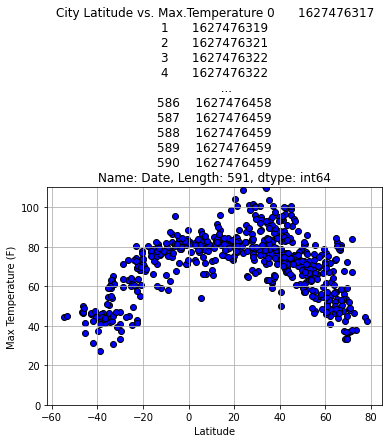

In [155]:
x_axis = cities_df['Lat']
y_axis = cities_df['Max Temp']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)
Date = cities_df['Date']
# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Max.Temperature {Date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("lat_temp_plot.png")


## Latitude vs. Humidity Plot

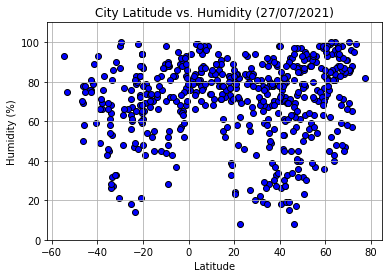

In [126]:
x_axis = cities_df['Lat']
y_axis = cities_df['Humidity']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity (27/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("lat_humidity.png")

## Latitude vs. Cloudiness Plot

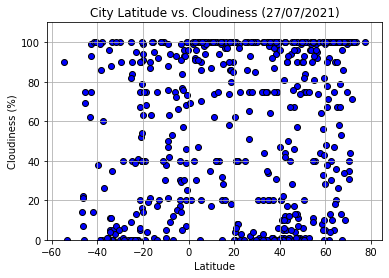

In [127]:
x_axis = cities_df['Lat']
y_axis = cities_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,110)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (27/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("lat_cloudiness.png")

## Latitude vs. Wind Speed Plot

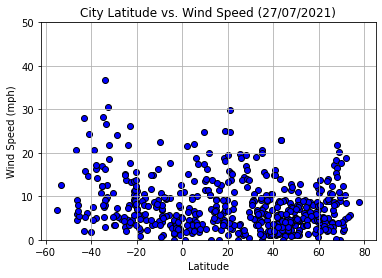

In [129]:
x_axis = cities_df['Lat']
y_axis = cities_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
# Set the upper and lower limits of our y axis
plt.ylim(0,50)

# Set the upper and lower limits of our x axis
plt.xlim(-62,85)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed (27/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("lat_windspeed.png")

## Linear Regression

In [59]:
cities_df.head(2)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,caravelas,-17.7125,-39.2481,80.51,59,0,9.53,1627476317,BR
1,lakhimpur,27.9500,80.7667,86.20,74,100,6.26,1627476319,IN


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:0.34726213414929447


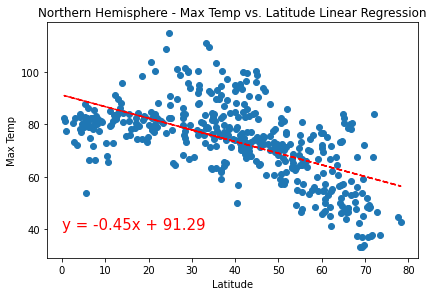

In [154]:
northern_hem_df = cities_df[cities_df['Lat'] >= 0]
southern_hem_df = cities_df[cities_df['Lat'] < 0]

x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Max Temp']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is:{rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7048047290857306


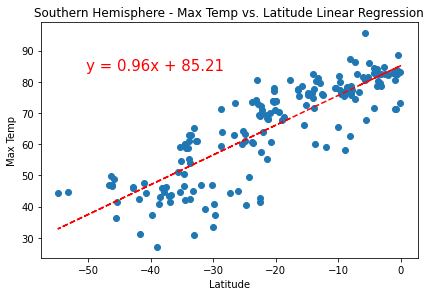

In [152]:
x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Max Temp']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.2, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 4.556470635769219e-05


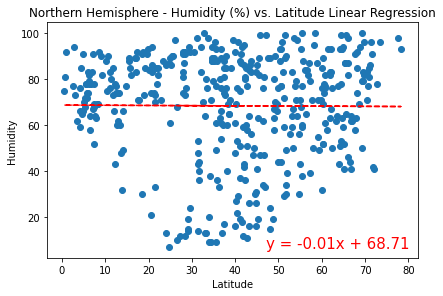

In [151]:
x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Humidity']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .2), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.009509564022087509


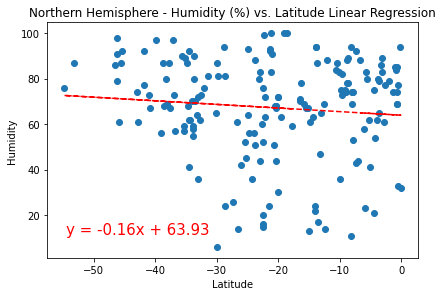

In [132]:
x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Humidity']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.15, .25), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 1.6864491746375577e-05


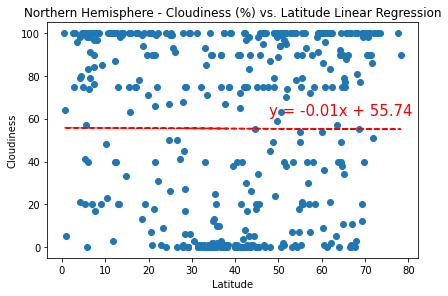

In [150]:
x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Cloudiness']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .65), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006146164045574506


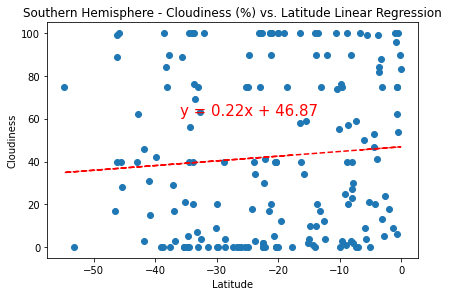

In [149]:
x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Cloudiness']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.4, .65), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0004719166953315454


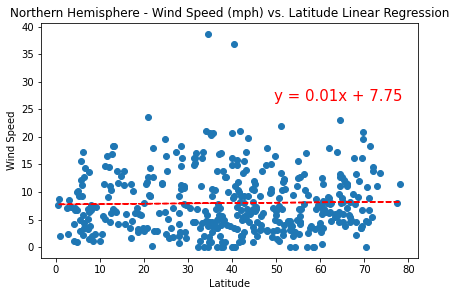

In [148]:
x_axis = northern_hem_df['Lat']
y_axis = northern_hem_df['Wind Speed']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .7), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.025419228091703796


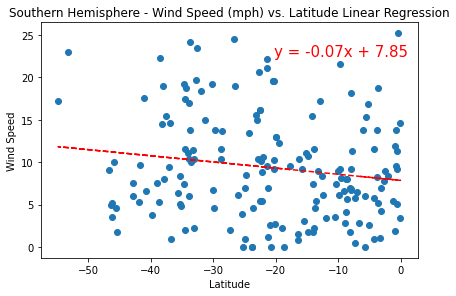

In [147]:
x_axis = southern_hem_df['Lat']
y_axis = southern_hem_df['Wind Speed']

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout()

#create linear regression model
slope, intercept, rvalue, pvalue, std_err = st.linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"The r-value is: {rvalue**2}")
#display linear regression model on plot
plt.plot(x_axis,fit,"--", color='red')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, xy=(.6, .85), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15,color="red")

plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.show()